**Load the dataset**

In [ ]:
import pandas as pd

# Load data
df_car = pd.read_csv('data_car_sales.csv')

# The shape of dataset
df_car.shape

(539, 13)

**Print first 5 records from dataset**

In [ ]:
df_car.head(5)


car_model status  km gear_box  ...   color             origin        price    area
0   audi-a6    New   0     Auto  ...   Brown  Domestic Assemble  589 million  Ha Noi
1   audi-a6    New   0     Auto  ...  Silver             Import  527 million  Ha Noi
2   audi-a6    New   0     Auto  ...   White  Domestic Assemble  468 million  Ha Noi
3   audi-a6    New   0   Manual  ...   White  Domestic Assemble  499 million  Ha Noi
4   audi-a6    New   0   Manual  ...   White             Import  498 million  Ha Noi

[5 rows x 13 columns]

**Report by type of cars**

In [ ]:
df_car[['car_type', 'car_model']].groupby('car_type').count().sort_values(by='car_model')

car_model
car_type            
Crossover         16
Truck             35
Pickup            42
Hatchback        108
SUV              134
Sedan            204

**Pie plot by type of cars**

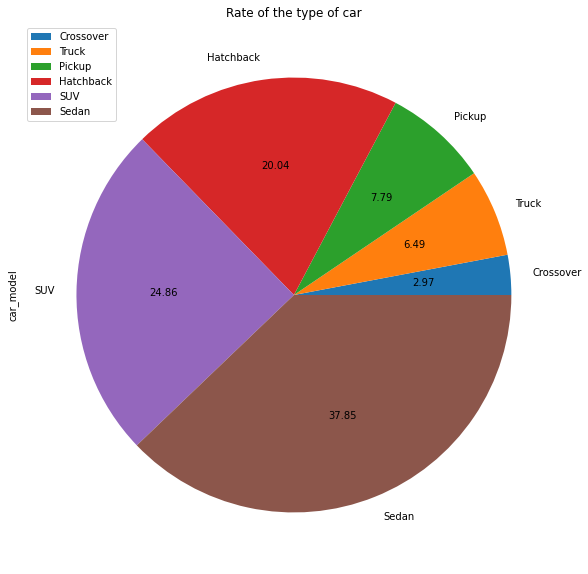

In [ ]:
from matplotlib import pyplot as plt


df_car_type = df_car.groupby('car_type').count().sort_values(by='car_model')
df_car_type.plot.pie(y='car_model', figsize=(20, 10), title='Rate of the type of car', autopct='%.2f')

**Report by brand of cars**

In [ ]:
df_car_brand = df_car.copy()
df_car_brand['tmp'] = df_car_brand['car_model'].str.find('-')
df_car_brand['car_brand'] = df_car_brand.apply(lambda x: x['car_model'][:x['tmp']] if x['tmp'] != -1 else x['car_model'], 1)

df_car_brand[['car_brand', 'car_model']].groupby('car_brand').count().sort_values(by='car_model')

car_model
car_brand           
cadillac           3
lexus              9
nissan            11
bmw               13
audi              15
landrover         18
isuzu             20
suzuki            23
thaco             24
kia               26
mercedes          27
ford              31
honda             37
toyota            42
vinfast           56
hyundai           83
mazda            101

**Pie plot by brand of cars**

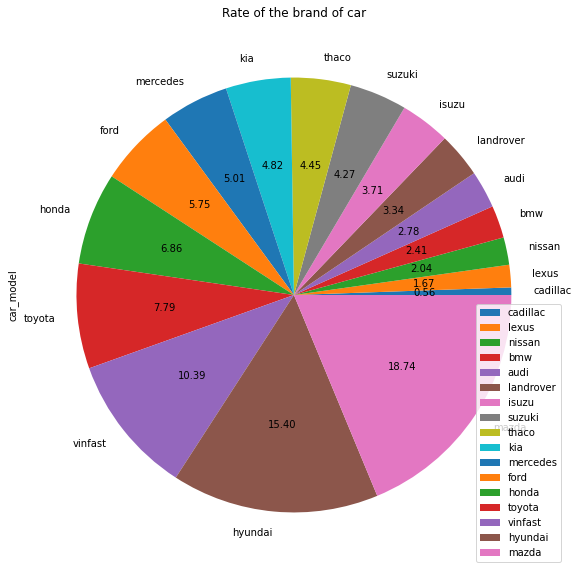

In [ ]:
df_brand = df_car_brand[['car_brand', 'car_model']].groupby('car_brand').count().sort_values(by='car_model')
df_brand.plot.pie(y='car_model', figsize=(20, 10), title='Rate of the brand of car', autopct='%.2f')


**Report by color of cars**

In [ ]:
df_car[['color', 'car_model']].groupby('color').count().sort_values(by='car_model')

car_model
color                    
Gray Silver             1
Gun Barrel              1
Burnt Sand              2
Yellow                  4
Dark Gray Blue          6
Others                  7
Bordeaux                8
Orange                  8
Copper                 10
Brown                  17
Gray                   25
Silver                 49
Dark Blue              52
Red                    87
Black                 128
White                 134

**Bar plot by color of cars**

Text(0.5, 1.0, 'Quantity of colors of cars')

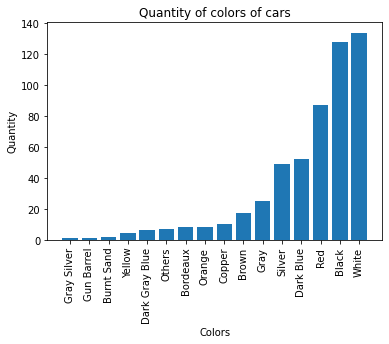

In [ ]:
df_car_color = df_car.groupby('color').count().sort_values(by='car_model')
colors = df_car_color.index
values = df_car_color.car_model.values
plt.bar(colors,values)
plt.xticks(colors, rotation=90)
plt.xlabel("Colors")
plt.ylabel("Quantity")
plt.title("Quantity of colors of cars")


**Report by area of cars**

In [ ]:
df_car_area = df_car[['area', 'car_model']].groupby('area').count().sort_values('car_model')
df_car_area[df_car_area['car_model']>10]

car_model
area                 
Binh Duong         11
Ha Nam             12
Bac Ninh           13
Hai Phong          14
Nghe An            20
Quang Ninh         27
TP HCM            109
Ha Noi            266

**Barh plot by area of cars**

Text(0.5, 1.0, 'Quantity of cars by area')

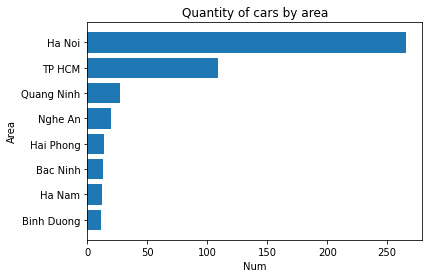

In [ ]:
df_car_areas = df_car_area[df_car_area['car_model']>10]
areas = df_car_areas.index
num = df_car_areas.car_model.values
plt.barh(areas,num)
plt.xlabel("Num")
plt.ylabel("Area")
plt.title("Quantity of cars by area")


**Histogram plot by price**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Quantity')

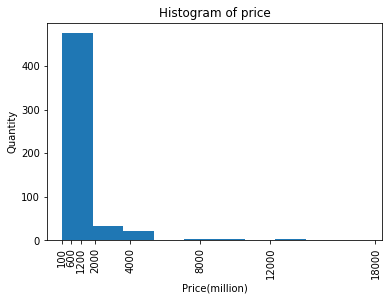

In [ ]:
import pandas as pd
df_price = df_car.copy()
df_price_M = df_car[df_car['price'].str.contains('million')]
df_price_M['tmp'] = df_price_M['price'].str.replace(' million','')
prices = df_price_M['tmp'].apply(pd.to_numeric).values

fig,ax = plt.subplots(1,1)
plt.hist(prices)
plt.title("Histogram of price")
plt.xticks([100,600,1200,2000,4000,8000,12000,18000], rotation=90)
plt.xlabel('Price(million)')
plt.ylabel('Quantity')

In [ ]:
df_car['tmp'].describe()

count             539
unique             24
top       hyundai-i10
freq               67
Name: car_model, dtype: object

In [ ]:
df_car.describe()

km     car_year
count  539.000000   539.000000
mean     0.005566  2017.857143
std      0.129219     3.038171
min      0.000000  2000.000000
25%      0.000000  2018.000000
50%      0.000000  2018.000000
75%      0.000000  2019.000000
max      3.000000  2020.000000